In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [342]:
car_data_df=pd.read_csv(r"C:\Users\apurba.mondal\Documents\result_car_data.csv")

In [343]:
car_data_df.rename(columns={'OWNER.1':'OWNER'},inplace=True)

In [344]:
car_data_df['BRAND']=car_data_df['CAR_NAME'].str.split(' ').str[0]

In [345]:
car_data_df

,SALES_ID,CAR_NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,OWNER,TRANSMISSION,MILEAGE,CAR_ENGINE,MAX_POWER,SEAT,POSTAL_CODE,CITY_NAME,STATE_NAME,REGIONS,SOLD,BRAND
0,1651,Tata Tiago 1.05 Revotorq XE,2017,325000,120000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,452003,Indore,Madhya Pradesh,Central,Y,Tata
1,5466,Tata Tiago 1.05 Revotorq XE,2018,450000,90000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,431001,Aurangabad,Maharashtra,West,N,Tata
2,749,Tata Tiago 1.05 Revotorq XM,2017,360000,50000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,680001,Thrissur,Kerala,South,Y,Tata
3,7101,Tata Tiago 1.05 Revotorq XT,2016,400000,60000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,248001,Dehradun,Uttarakhand,Central,N,Tata
4,5434,Tata Tiago 1.05 Revotorq XT,2017,450000,80000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,641043,Coimbatore,Tamil Nadu,South,N,Tata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4535,Volkswagen Polo 2015-2019 1.0 MPI Highline Plus,2018,678000,17000,Petrol,Individual,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,141003,Ludhiana,Punjab,North,N,Volkswagen
7902,1684,Volkswagen Polo 2015-2019 1.0 MPI Highline Plus,2018,678000,17000,Petrol,Individual,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,641043,Coimbatore,Tamil Nadu,South,Y,Volkswagen
7903,4747,Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,680001,Thrissur,Kerala,South,N,Volkswagen
7904,3357,Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,560063,Bangalore,Karnataka,South,N,Volkswagen


### Question C::----

In [380]:
brand_count_df=car_data_df.groupby('BRAND')[['SALES_ID']] .count(
).rename(columns={'SALES_ID':'NO_OF_SALES'}).sort_values(
    'NO_OF_SALES',ascending=False)
brand_count_df.head(10)

,NO_OF_SALES
BRAND,
Maruti,2367
Hyundai,1360
Mahindra,758
Tata,719
Honda,466
Toyota,452
Ford,388
Chevrolet,230
Renault,228


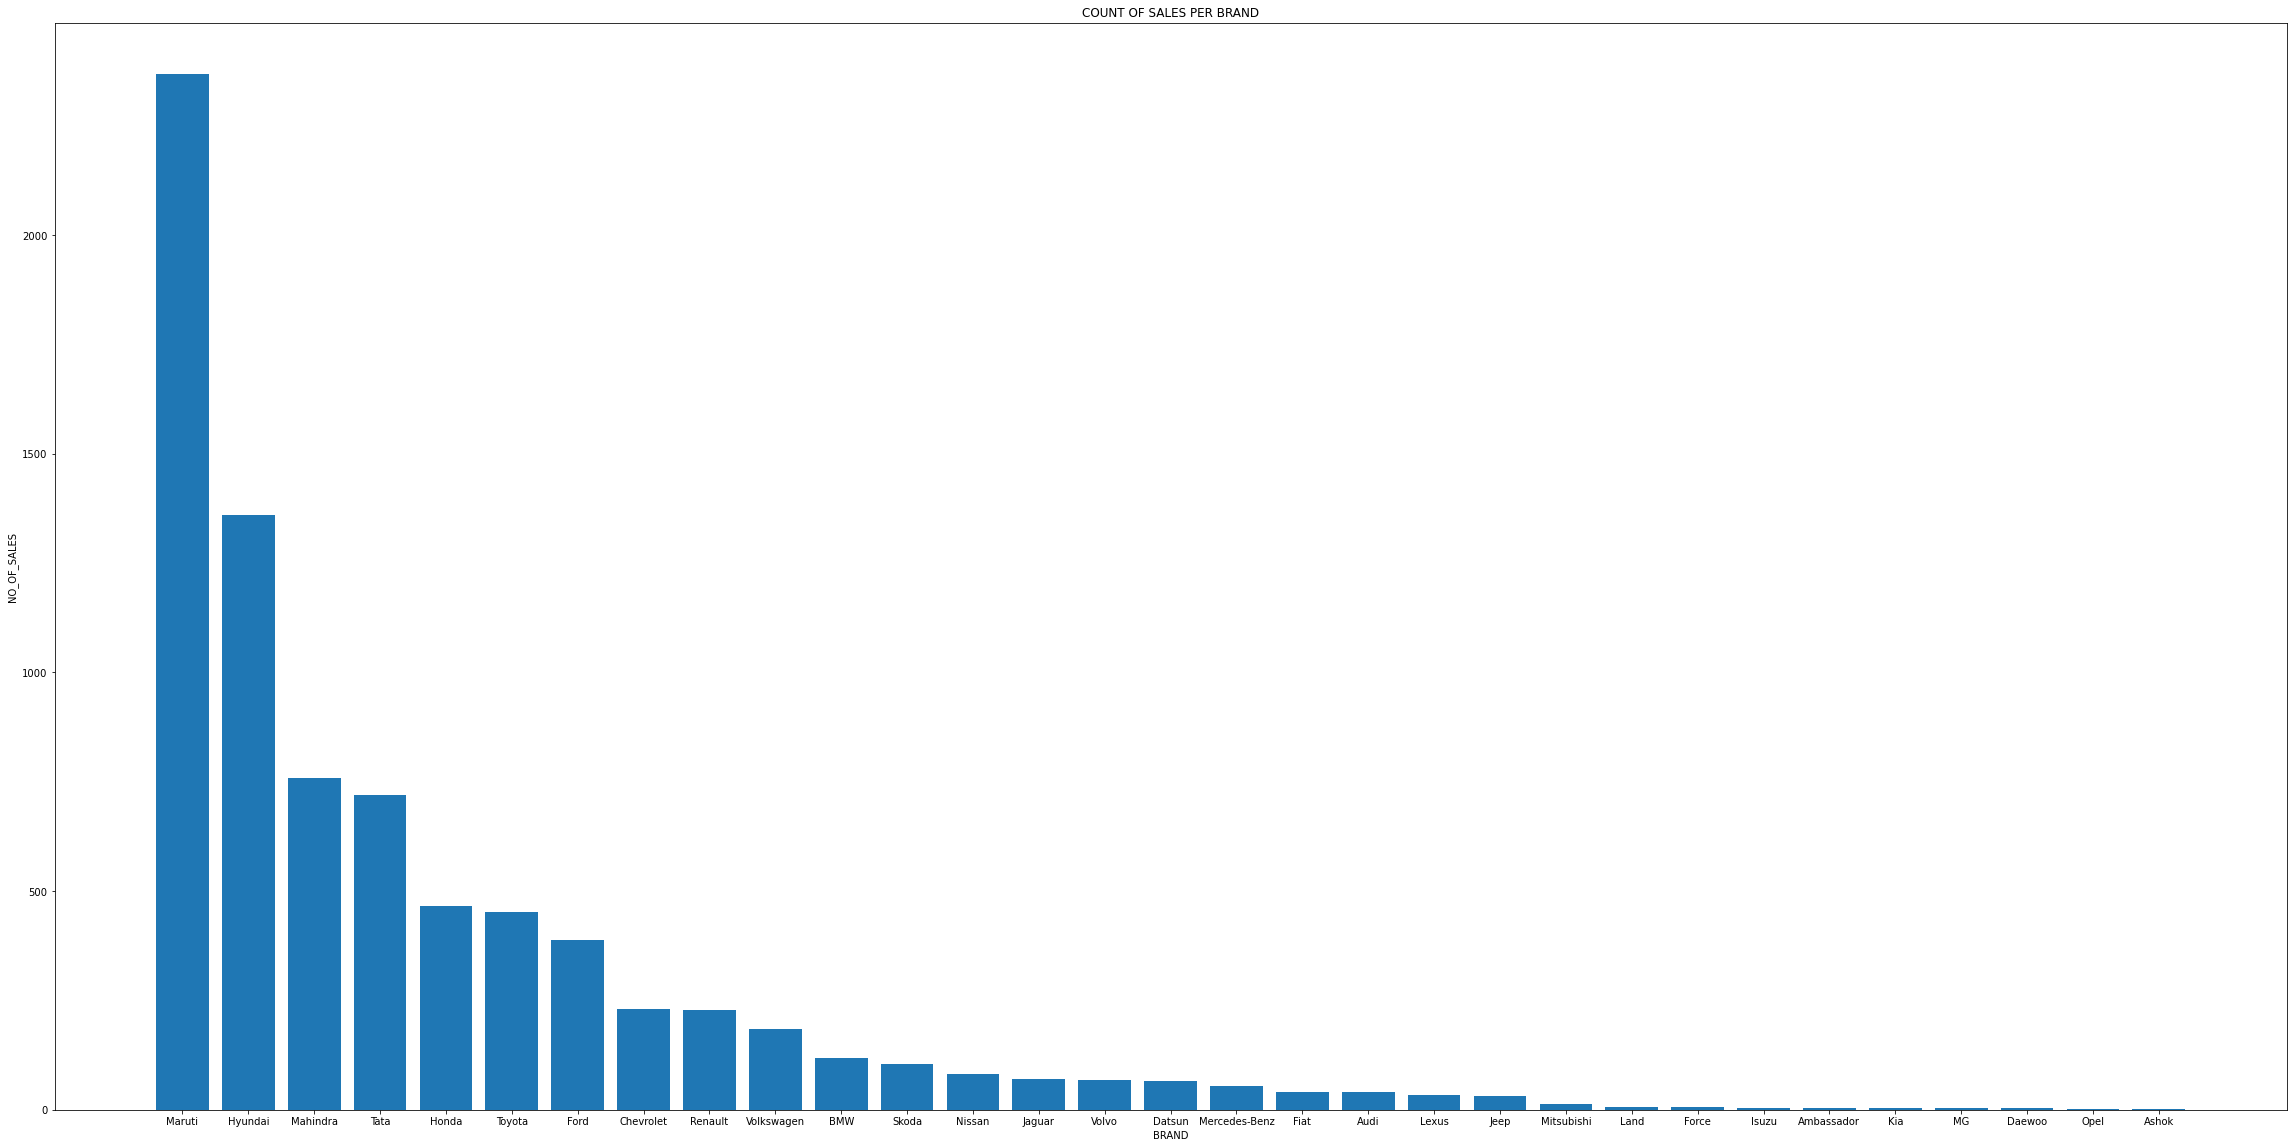

In [347]:
plt.figure(figsize=(40,20))
plt.bar(brand_count_df.index,brand_count_df.NO_OF_SALES)
plt.xlabel('BRAND')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

## Question D ::--

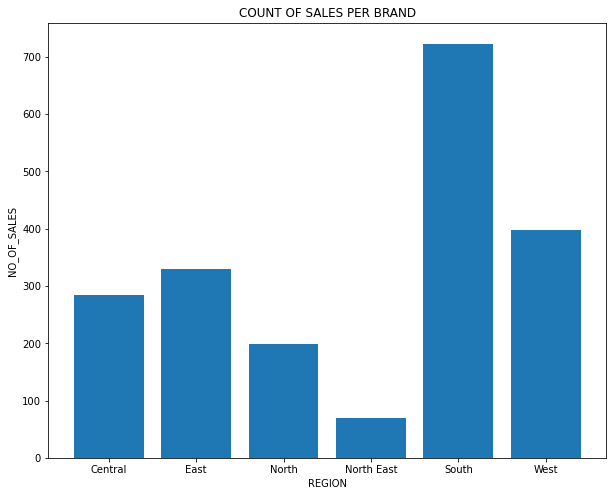

In [398]:
region_df1=car_data_df[car_data_df.SOLD=='Y'].groupby('REGIONS').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('REGIONS',ascending=True)
region_df1
plt.figure(figsize=(10,8))
plt.bar(region_df1.index,region_df1.NUMBER_OF_SALES)
plt.xlabel('REGION')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

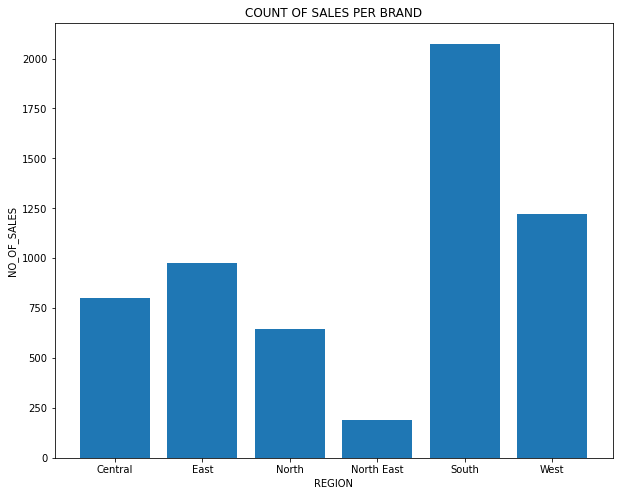

In [401]:
region_df2=car_data_df[car_data_df.SOLD=='N'].groupby('REGIONS').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('REGIONS',ascending=True)
region_df2
plt.figure(figsize=(10,8))
plt.bar(region_df2.index,region_df2.NUMBER_OF_SALES)
plt.xlabel('REGION')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

In [349]:
state_df1=car_data_df.groupby('STATE_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('NUMBER_OF_SALES',ascending=False)


In [350]:
state_df2=car_data_df.groupby('STATE_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('TOTAL_REVENUE',ascending=False).head(7)

In [351]:
city_df1=car_data_df.groupby('CITY_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('NUMBER_OF_SALES',ascending=False).head(15)

In [352]:
city_df2=car_data_df.groupby('CITY_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('TOTAL_REVENUE',ascending=False).head(7)

In [387]:
location_df1=car_data_df[car_data_df.SOLD=='Y'].groupby(['REGIONS','STATE_NAME','CITY_NAME'],as_index=False).agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values(
    ['REGIONS','STATE_NAME','NUMBER_OF_SALES','CITY_NAME'],ascending=[True,True,False,False])
location_df1

,REGIONS,STATE_NAME,CITY_NAME,NUMBER_OF_SALES,TOTAL_REVENUE
0,Central,Madhya Pradesh,Indore,69,44915997
1,Central,Uttar Pradesh,Noida,80,52368999
2,Central,Uttar Pradesh,kanpur,65,39227501
3,Central,Uttarakhand,Dehradun,70,48085000
4,East,Bihar,Patna,69,46364995
5,East,Jharkhand,Jamshedpur,65,54299999
6,East,Jharkhand,Ranchi,62,41457996
7,East,Odisha,Bhubaneshwar,64,40447997
8,East,West Bengal,Kolkata,69,52936996
9,North,Delhi,Delhi,80,59100996


In [385]:
location_df2=car_data_df[car_data_df.SOLD=='N'].groupby(['REGIONS','STATE_NAME','CITY_NAME'], as_index=False).agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values(
    ['REGIONS','STATE_NAME','NUMBER_OF_SALES','CITY_NAME'],ascending=[True,True,False,False])
location_df2

,REGIONS,STATE_NAME,CITY_NAME,NUMBER_OF_SALES,TOTAL_REVENUE
0,Central,Madhya Pradesh,Indore,188,114508993
1,Central,Uttar Pradesh,Noida,223,159187993
2,Central,Uttar Pradesh,kanpur,182,107143996
3,Central,Uttarakhand,Dehradun,210,115650253
4,East,Bihar,Patna,188,143432588
6,East,Jharkhand,Ranchi,214,134742991
5,East,Jharkhand,Jamshedpur,182,124704996
7,East,Odisha,Bhubaneshwar,191,118883495
8,East,West Bengal,Kolkata,199,108663992
9,North,Delhi,Delhi,240,155752994


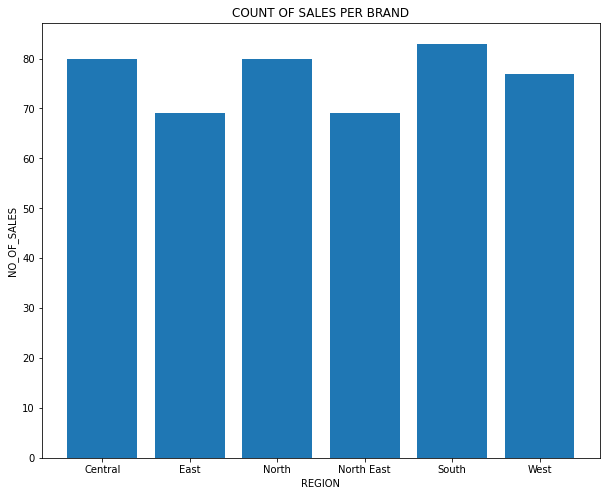

In [392]:
plt.figure(figsize=(10,8))
plt.bar(location_df1.REGIONS,location_df1.NUMBER_OF_SALES)
plt.xlabel('REGION')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

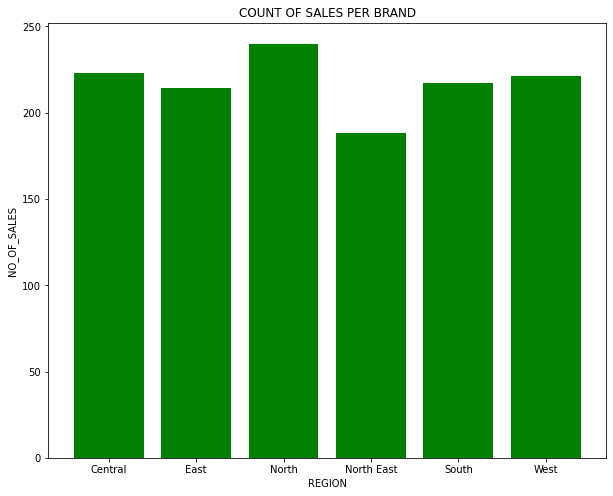

In [422]:
plt.figure(figsize=(10,8))
plt.bar(location_df2.REGIONS,location_df2.NUMBER_OF_SALES,color=['green'])
plt.xlabel('REGION')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

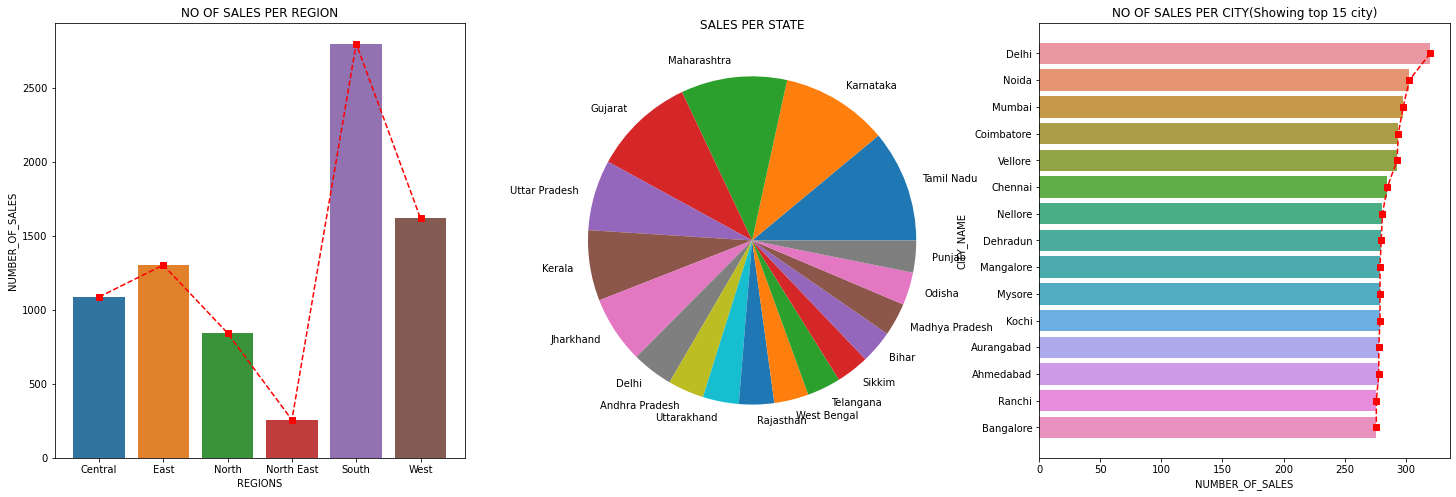

In [354]:
fig,axes=plt.subplots(1,3,figsize=(25,8))

##Chart 1:--
axes[0].set_title('NO OF SALES PER REGION')
sns.barplot(x=region_df.index,y=region_df.NUMBER_OF_SALES,ax=axes[0])
axes[0].plot(region_df.index,region_df.NUMBER_OF_SALES,'s--r');

##chart 2:--
axes[1].set_title('SALES PER STATE')
axes[1].pie(state_df1.NUMBER_OF_SALES,labels=state_df1.index);

##chart 3:--
axes[2].set_title('NO OF SALES PER CITY(Showing top 15 city)')
sns.barplot(y=city_df1.index,x=city_df1.NUMBER_OF_SALES,ax=axes[2]);
axes[2].plot(city_df1.NUMBER_OF_SALES,city_df1.index,'s--r');



# ##chart 4:--
# axes[1,0].set_title('TOTAL REVENUE PER REGION')
# sns.barplot(x=region_df.index,y=region_df.TOTAL_REVENUE,ax=axes[1,0])
# axes[1,0].set_ylabel('TOTAL REVENUE  X  l0+e9')
# axes[1,0].plot(region_df.index,region_df.TOTAL_REVENUE,'s--r');

# ##chart 5:--
# axes[1,1].set_title('TOTAL REVENUE PER STATE(Showing top 7 state)')
# sns.barplot(x=state_df2.index,y=state_df2.TOTAL_REVENUE,ax=axes[1,1])
# axes[1,1].set_ylabel('TOTAL REVENUE  X  10+e8')
# axes[1,1].plot(state_df2.index,state_df2.TOTAL_REVENUE,'s--r');

# ##chart 6:--
# axes[1,2].set_title('TOTAL REVENUE PER CITY(Showing top 7 city)')
# sns.barplot(x=city_df2.index,y=city_df2.TOTAL_REVENUE,ax=axes[1,2])
# axes[1,2].set_ylabel('TOTAL REVENUE  X  10+e8')
# axes[1,2].plot(city_df2.index,city_df2.TOTAL_REVENUE,'s--r');


In [355]:
car_data_df.CAR_ENGINE=car_data_df.CAR_ENGINE.str.split(" ").str[0]
car_data_df.CAR_ENGINE=car_data_df.CAR_ENGINE.astype(int)


In [356]:
for i in car_data_df.index:
    if str(car_data_df.MILEAGE[i]).endswith("km/kg"):
        car_data_df.MILEAGE[i]=float(car_data_df.MILEAGE[i].split(' ')[0])*1.4
    elif str(car_data_df.MILEAGE[i]).endswith("kmpl"):
        car_data_df.MILEAGE[i]=float(car_data_df.MILEAGE[i].split(' ')[0])
car_data_df.MILEAGE=car_data_df.MILEAGE.astype(float)

C:\Users\apurba.mondal\AppData\Local\Temp\ipykernel_11632\1886968898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_df.MILEAGE[i]=float(car_data_df.MILEAGE[i].split(' ')[0])
C:\Users\apurba.mondal\AppData\Local\Temp\ipykernel_11632\1886968898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_df.MILEAGE[i]=float(car_data_df.MILEAGE[i].split(' ')[0])*1.4


In [357]:
car_data_df.MAX_POWER=car_data_df.MAX_POWER.str.split(" ").str[0]
car_data_df.MAX_POWER=car_data_df.MAX_POWER.astype(float)


In [358]:
car_data_df.shape

(7906, 19)

In [359]:
car_data_df.head(5)

,SALES_ID,CAR_NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,OWNER,TRANSMISSION,MILEAGE,CAR_ENGINE,MAX_POWER,SEAT,POSTAL_CODE,CITY_NAME,STATE_NAME,REGIONS,SOLD,BRAND
0,1651,Tata Tiago 1.05 Revotorq XE,2017,325000,120000,Diesel,Individual,First Owner,Manual,27.28,1047,69.0,5,452003,Indore,Madhya Pradesh,Central,Y,Tata
1,5466,Tata Tiago 1.05 Revotorq XE,2018,450000,90000,Diesel,Individual,First Owner,Manual,27.28,1047,69.0,5,431001,Aurangabad,Maharashtra,West,N,Tata
2,749,Tata Tiago 1.05 Revotorq XM,2017,360000,50000,Diesel,Individual,First Owner,Manual,27.28,1047,69.0,5,680001,Thrissur,Kerala,South,Y,Tata
3,7101,Tata Tiago 1.05 Revotorq XT,2016,400000,60000,Diesel,Individual,First Owner,Manual,27.28,1047,69.0,5,248001,Dehradun,Uttarakhand,Central,N,Tata
4,5434,Tata Tiago 1.05 Revotorq XT,2017,450000,80000,Diesel,Individual,First Owner,Manual,27.28,1047,69.0,5,641043,Coimbatore,Tamil Nadu,South,N,Tata


In [406]:
car_corr_df=car_data_df[['SELLING_PRICE','YEAR','KM_DRIVEN','MILEAGE','CAR_ENGINE','MAX_POWER']]
car_corr_df

,SELLING_PRICE,YEAR,KM_DRIVEN,MILEAGE,CAR_ENGINE,MAX_POWER
0,325000,2017,120000,27.28,1047,69.0
1,450000,2018,90000,27.28,1047,69.0
2,360000,2017,50000,27.28,1047,69.0
3,400000,2016,60000,27.28,1047,69.0
4,450000,2017,80000,27.28,1047,69.0
...,...,...,...,...,...,...
7901,678000,2018,17000,18.78,999,75.0
7902,678000,2018,17000,18.78,999,75.0
7903,560000,2018,14495,18.78,999,75.0
7904,560000,2018,14495,18.78,999,75.0


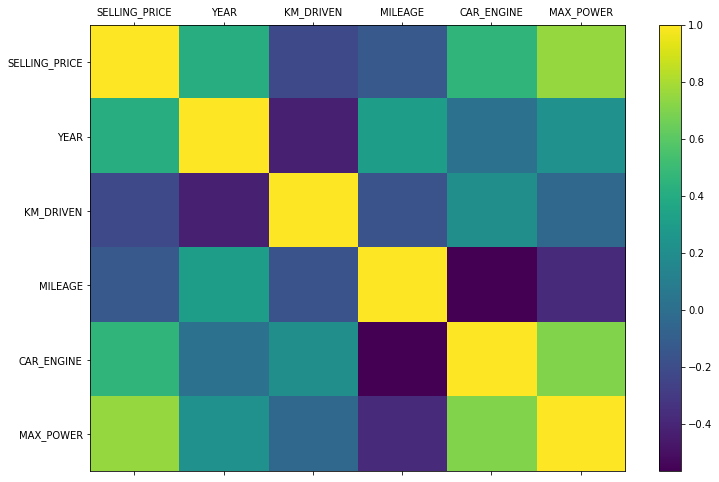

In [420]:
plt.figure(figsize=(12,8))
plt.matshow(car_corr_df.corr(),fignum=1, aspect='auto')
plt.xticks(range(len(car_corr_df.columns)),car_corr_df.columns)
plt.yticks(range(len(car_corr_df.columns)),car_corr_df.columns)
plt.colorbar()
plt.show();